In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [ ]:
len(df)

23486

In [ ]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [ ]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [ ]:
df['Recommended IND'].unique()

array([1, 0])

In [ ]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Values according to rating

In [ ]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

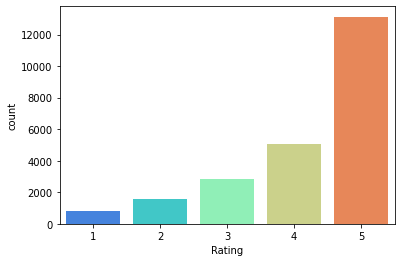

In [ ]:
sns.countplot(x='Rating', data=df, palette='rainbow')

13131 items are given 5 ratings.

Rating based on percentage.

In [ ]:
df["Rating"].dtypes

dtype('int64')

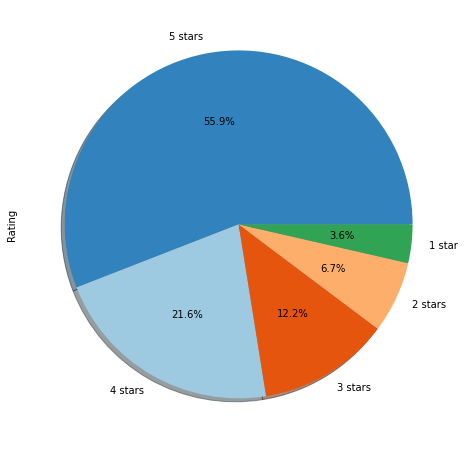

In [ ]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2)) #this kind of cmap can be used only if there are numeric values in the column

#  Recommended Index. (1- Yes, 0-No)

In [ ]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

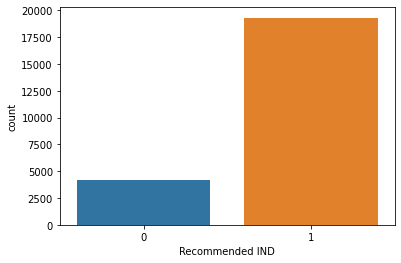

In [ ]:
sns.countplot(x="Recommended IND", data=df)

***Ratings and division name based on Index***

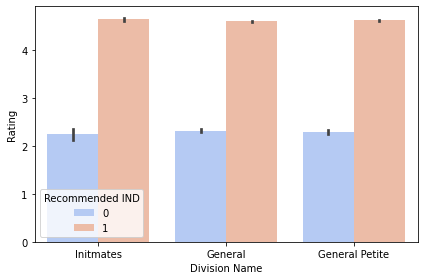

In [ ]:
sns.barplot(x="Division Name", y="Rating", data=df, palette='coolwarm',hue='Recommended IND')
plt.tight_layout()

# Items sold according to Department,Class and Division

In [ ]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [ ]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

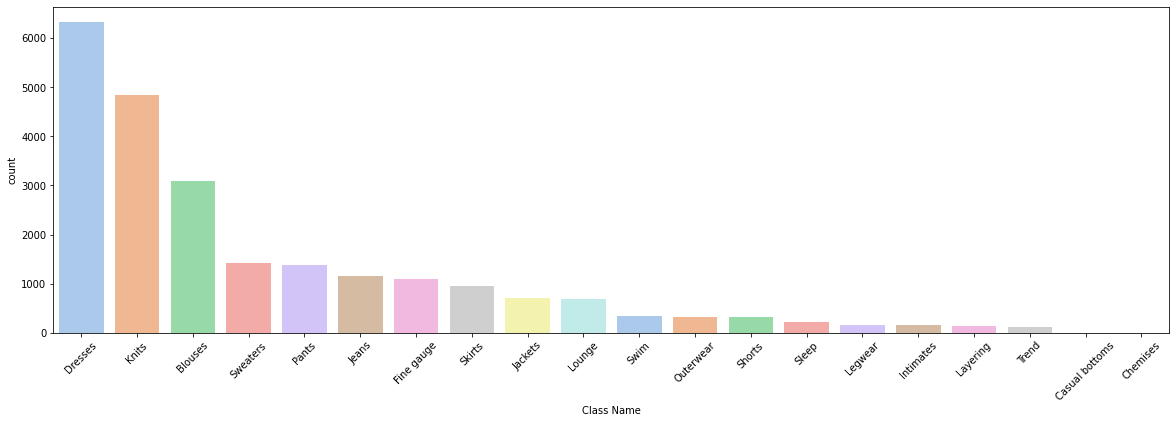

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='pastel', order=df['Class Name'].value_counts().index)
plt.xticks(rotation = 45)

Dresses are sold more, which are around 6400 units and then kints around 5000 units.

***Classifying classes based on department name***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

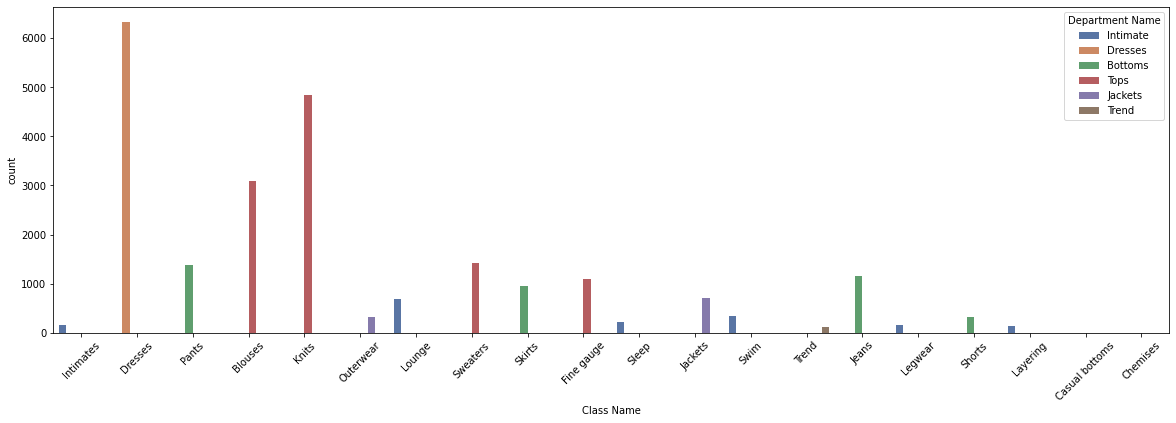

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='deep', hue='Department Name')
plt.xticks(rotation = 45)

Through the plot we can infer that a large number of Dresses fall on Dresses category, Blouses, knits, sweaters, fine gauge falls on tops category

***Departments in Each Division***

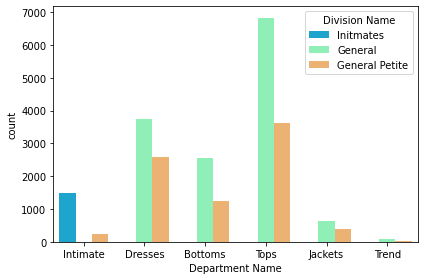

In [ ]:
sns.countplot(x="Department Name", data=df, palette='rainbow', hue='Division Name')
plt.tight_layout()

Dresses, bottoms, Tops comes in general division

***Department based on Rating***

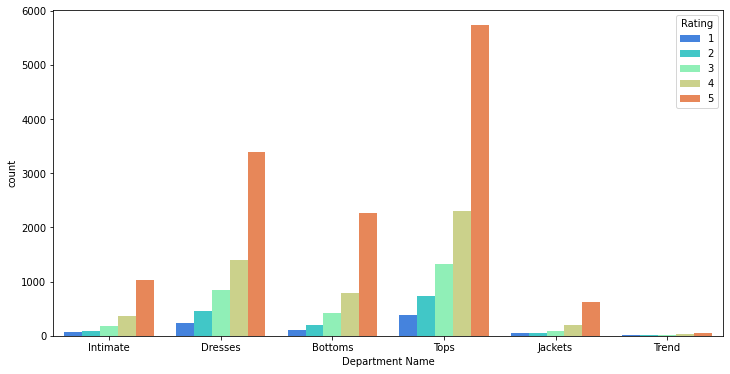

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='Department Name',data=df,hue='Rating',palette='rainbow')

Tops are on high rating of 5 and dress are followed by Tops

***Ratings based on Recommended Index***

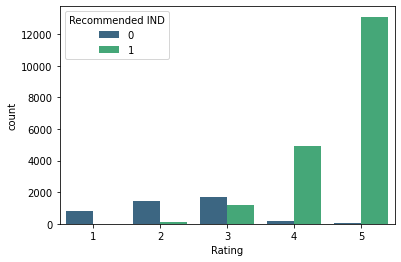

In [ ]:
sns.countplot(x='Rating',data=df,hue='Recommended IND',palette='viridis')

***Rating based on Division Name***

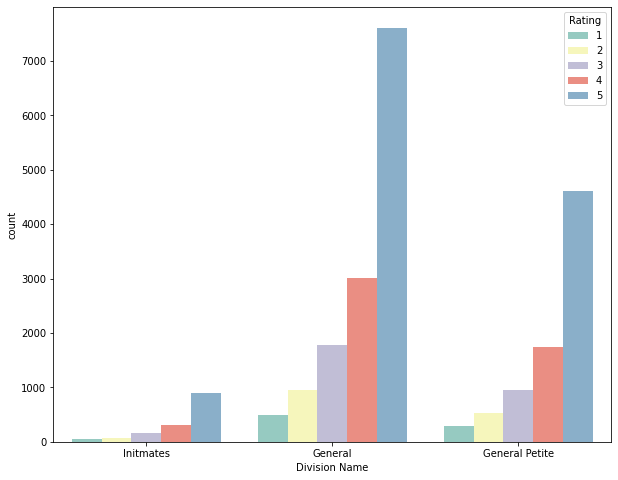

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Division Name',data=df,hue='Rating',palette='Set3')


 **Categoring Classes based on Ratings**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

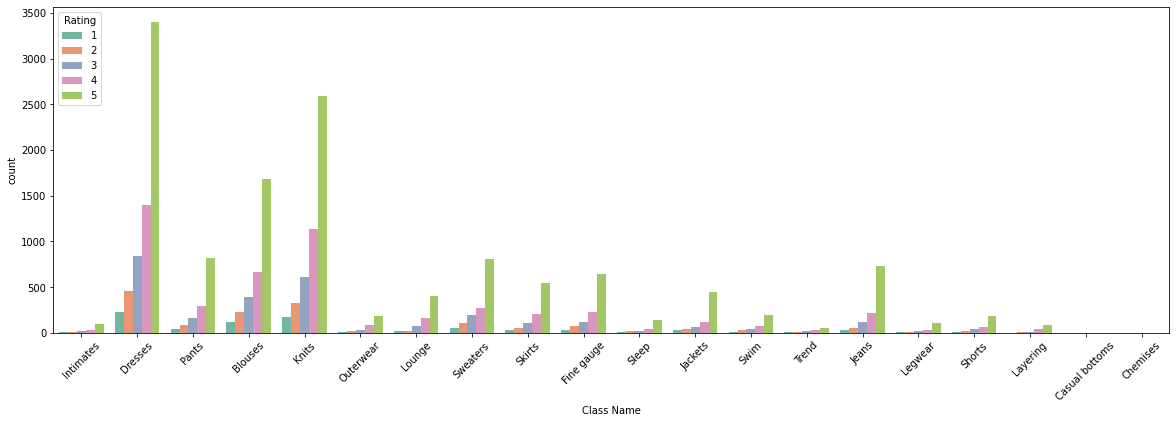

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df,hue='Rating',palette='Set2')
plt.xticks(rotation = 45)

# **Age of customers**

In [ ]:
df['Age'].nunique()

77

In [ ]:
df['Age'].max()

99

In [ ]:
df['Age'].min()

18

In [ ]:
df['Age'].mean()

43.198543813335604

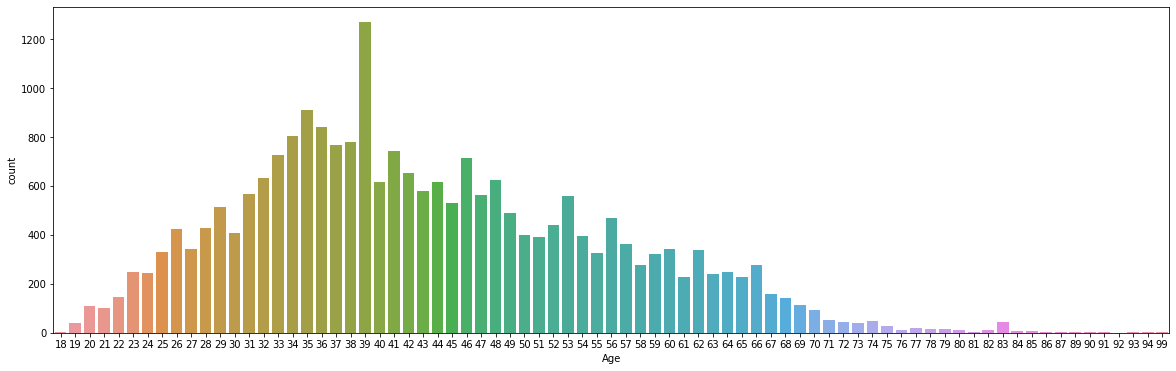

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



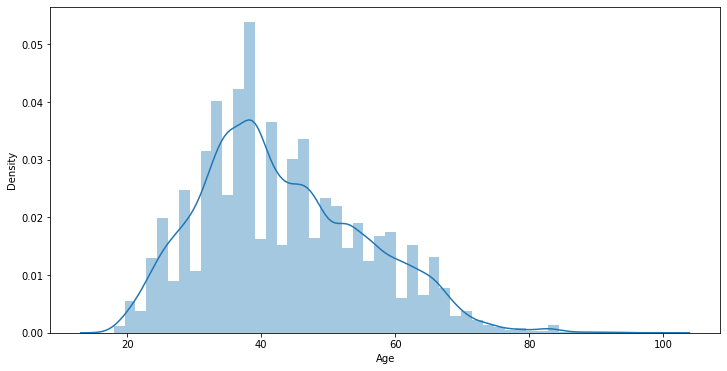

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(df['Age'],bins=50);

***Customers and Rating***

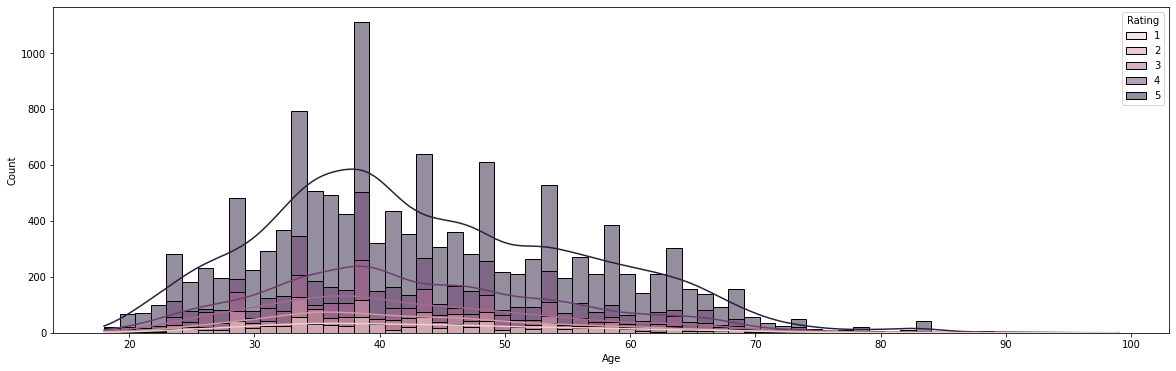

In [ ]:
plt.figure(figsize = (20,6))
sns.histplot( data=df, x= 'Age', bins='auto', hue='Rating', kde=True) 

<Figure size 1440x432 with 0 Axes>

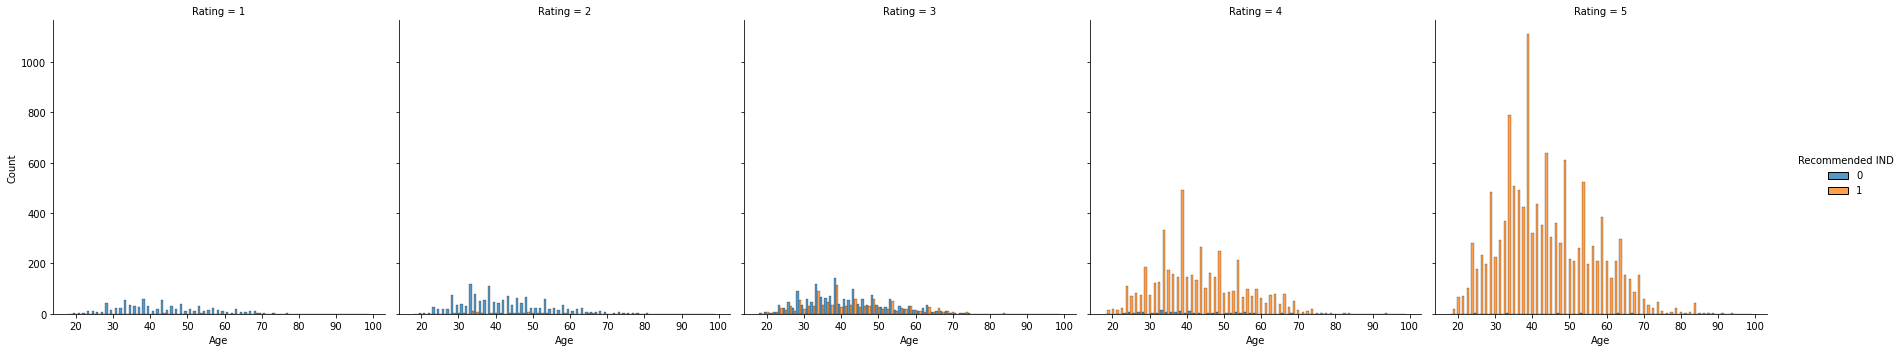

In [ ]:
plt.figure(figsize = (20,6))
sns.displot(df, x="Age", col="Rating", multiple="dodge", hue='Recommended IND')

*Most of the customers are around age of 43 and they have given rating of 5 mostly*